<a href="https://colab.research.google.com/github/arnav77/Student-grade-predictor/blob/master/grad_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
!unzip student.zip

--2020-02-22 23:00:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: ‘student.zip’

student.zip         100%[===================>]  20.00K  --.-KB/s    in 0.06s   

2020-02-22 23:00:50 (321 KB/s) - ‘student.zip’ saved [20478/20478]

Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


In [3]:
# Dataset for math class
df = pd.read_csv('student-mat.csv', sep=';', index_col=False)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [5]:
for col in df.columns:
  print('{} has {} attributes.'.format(col, len(df[col].value_counts())))

school has 2 attributes.
sex has 2 attributes.
age has 8 attributes.
address has 2 attributes.
famsize has 2 attributes.
Pstatus has 2 attributes.
Medu has 5 attributes.
Fedu has 5 attributes.
Mjob has 5 attributes.
Fjob has 5 attributes.
reason has 4 attributes.
guardian has 3 attributes.
traveltime has 4 attributes.
studytime has 4 attributes.
failures has 4 attributes.
schoolsup has 2 attributes.
famsup has 2 attributes.
paid has 2 attributes.
activities has 2 attributes.
nursery has 2 attributes.
higher has 2 attributes.
internet has 2 attributes.
romantic has 2 attributes.
famrel has 5 attributes.
freetime has 5 attributes.
goout has 5 attributes.
Dalc has 5 attributes.
Walc has 5 attributes.
health has 5 attributes.
absences has 34 attributes.
G1 has 17 attributes.
G2 has 17 attributes.
G3 has 18 attributes.


In [6]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [7]:
#understand code
def get_label_encodings(dataset):
  df = dataset.copy() # important
  cols = np.array(df.columns)
  print(cols)
  for col in cols:
    if df[col].dtype == 'O':
      df[col] = pd.Categorical(df[col])
      df[col] = df[col].cat.codes
  return df

df_label_encoded = get_label_encodings(df)
print(df.head())
df_label_encoded.head()

['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Mjob'
 'Fjob' 'reason' 'guardian' 'traveltime' 'studytime' 'failures'
 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet'
 'romantic' 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences'
 'G1' 'G2' 'G3']
  school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


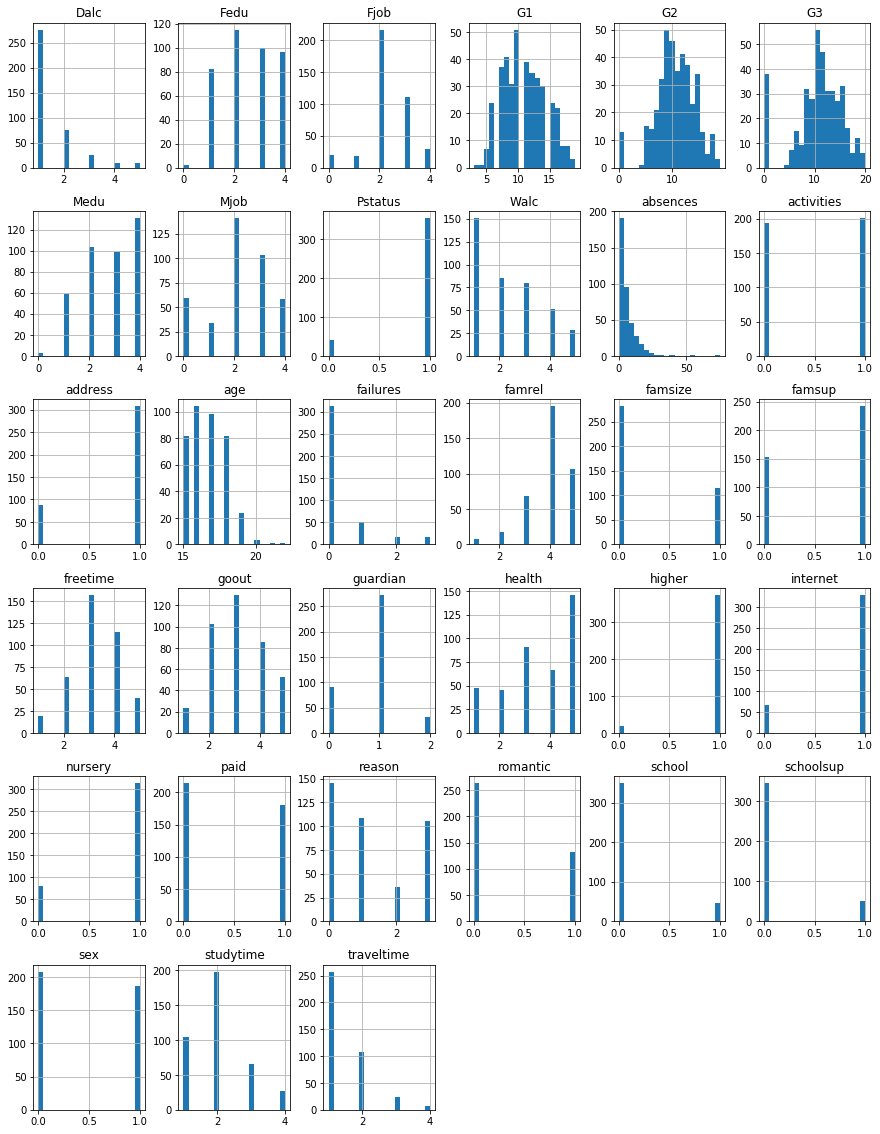

In [8]:
# Histogram analysis
%matplotlib inline
import matplotlib.pyplot as plt
df_label_encoded.hist(bins=20, figsize=(15,20))
plt.show()

In [9]:
# coorelations
# Pearson Correlation coefficients
corr_matrix = df.corr()
corr_matrix = corr_matrix.abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1,0.163658,0.163438,0.0706407,0.00414004,0.243665,0.0539401,0.0164344,0.126964,0.131125,0.117276,0.0621874,0.17523,0.0640815,0.143474,0.161579
Medu,0.163658,1,0.623455,0.171639,0.0649441,0.23668,0.00391446,0.0308909,0.0640944,0.0198341,0.0471235,0.0468778,0.100285,0.205341,0.215527,0.217147
Fedu,0.163438,0.623455,1,0.158194,0.00917464,0.250408,0.00136973,0.0128455,0.0431047,0.00238643,0.012631,0.0147415,0.0244729,0.19027,0.164893,0.152457
traveltime,0.0706407,0.171639,0.158194,1,0.100909,0.0922387,0.016808,0.0170249,0.0285397,0.138325,0.134116,0.00750061,0.0129438,0.09304,0.153198,0.117142
studytime,0.00414004,0.0649441,0.00917464,0.100909,1,0.173563,0.0397307,0.143198,0.0639037,0.196019,0.253785,0.0756159,0.0627002,0.160612,0.13588,0.0978197
failures,0.243665,0.23668,0.250408,0.0922387,0.173563,1,0.0443366,0.0919875,0.124561,0.136047,0.141962,0.0658273,0.0637258,0.354718,0.355896,0.360415
famrel,0.0539401,0.00391446,0.00136973,0.016808,0.0397307,0.0443366,1,0.150701,0.0645684,0.0775944,0.113397,0.0940557,0.0443541,0.0221683,0.0182813,0.0513634
freetime,0.0164344,0.0308909,0.0128455,0.0170249,0.143198,0.0919875,0.150701,1,0.285019,0.209001,0.147822,0.0757334,0.0580779,0.0126129,0.0137771,0.0113072
goout,0.126964,0.0640944,0.0431047,0.0285397,0.0639037,0.124561,0.0645684,0.285019,1,0.266994,0.420386,0.00957725,0.0443022,0.149104,0.16225,0.132791
Dalc,0.131125,0.0198341,0.00238643,0.138325,0.196019,0.136047,0.0775944,0.209001,0.266994,1,0.647544,0.0771796,0.111908,0.0941588,0.0641202,0.05466


In [0]:
# Ready the dataset
 Y = np.array(df[['G1','G2','G3']])
 
 def n_classification_criteria(Y, n):
    '''
    Inputs:
    Y == Labels
    n = 2 or 5
    '''
    if n==2:
        Y = (Y>10)*1
    elif n==5:
        Y = (Y>=16)*1 + (Y>=14)*1 + (Y>=12)*1 + (Y>=10)*1
    else:
        assert False, 'Wrong n!'
    return Y
 
Y_5 = n_classification_criteria(Y, 5)
Y_2 = n_classification_criteria(Y, 2)

del df['G1']
del df['G2']
del df['G3']

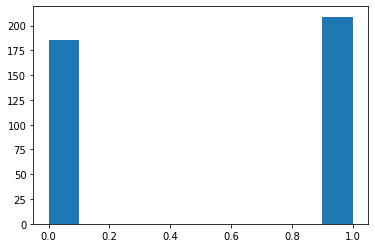

(array([130.,   0., 103.,   0.,   0.,  62.,   0.,  60.,   0.,  40.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

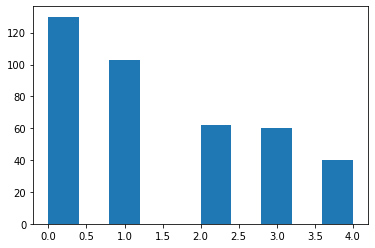

In [11]:
plt.hist(Y_2[:,2])
plt.show()
plt.hist(Y_5[:,2])

In [12]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4


In [13]:
def get_one_hot_encodings(dataset):
  df = dataset.copy()
  cols = np.array(df.columns)
  for col in cols:
    if df[col].dtype=='O':
      if len(df[col].value_counts())==2:
        df[col] = pd.Categorical(df[col])
        df[col] = df[col].cat.codes
      else:
        dum_df = pd.get_dummies(df, columns=[col], prefix=[col])
        df = dum_df
  return df

df_one_hot_encoded = get_one_hot_encodings(df)
X = np.array(df_one_hot_encoded)
df_one_hot_encoded.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [0]:
# random sampling and making a train set and test set
 
# We will consider test_to_train_ratio = 0.9
 
def shuffle(X, Y, Y_2, Y_5):
    perm = np.random.permutation(len(X))-1
    X = X[perm]
    Y = Y[perm]
    Y_2 = Y_2[perm]
    Y_5 = Y_5[perm]
    return X, Y, Y_2, Y_5    
 
# We will come back later here!!
def test_train_split(X, Y, Y_2, Y_5, ratio):    
    X, Y, Y_2, Y_5 = shuffle(X, Y, Y_2, Y_5)
    e = ratio
    X_train = X[:int(e*len(X))]
    Y_train = Y[:int(e*len(X))]
    Y_2_train = Y_2[:int(e*len(X))]
    Y_5_train = Y_5[:int(e*len(X))]
 
    X_test = X[int(e*len(X)):]
    Y_test = Y[int(e*len(X)):]
    Y_2_test = Y_2[int(e*len(X)):]
    Y_5_test = Y_5[int(e*len(X)):]
    
    return X_train, Y_train, Y_2_train, Y_5_train, X_test, Y_test, Y_2_test, Y_5_test
 
X_train, Y_train, Y_2_train, Y_5_train, X_test, Y_test, Y_2_test, Y_5_test = test_train_split(X, Y, Y_2, Y_5, ratio=0.9)


In [15]:
def min_max_scaling(X, Y, norm_dict=None):
  if not norm_dict is None:
    X = (X - norm_dict['X'][0]) / (norm_dict['X'][1] - norm_dict['X'][0])
    Y = (Y - norm_dict['Y'][0]) / (norm_dict['Y'][1] - norm_dict['Y'][0])
    return X, Y
  
  norm_dict = {}
  norm_dict['X'] = [X.min(axis=0), X.max(axis=0)]
  norm_dict['Y'] = [Y.min(axis=0), Y.max(axis=0)]

  X = (X - X.min(axis=0))/(X.max(axis=0)- X.min(axis=0))
  Y_reg = (Y - Y.min())/(Y.max()- Y.min())

  return X, Y_reg, norm_dict

X_train, Y_train, norm_dict = min_max_scaling(X_train, Y_train)
X_test, Y_test = min_max_scaling(X_test, Y_test, norm_dict)
print(norm_dict)

{'X': [array([ 0,  0, 15,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0]), array([ 1,  1, 22,  1,  1,  1,  4,  4,  4,  4,  3,  1,  1,  1,  1,  1,  1,
        1,  1,  5,  5,  5,  5,  5,  5, 75,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1])], 'Y': [array([3, 0, 0]), array([19, 19, 20])]}


In [0]:
# Binary Classification
 
class binary_logistic_regressor():
    def __init__(self, input_size, epochs=1000, learning_rate=0.1, batch_size=256):
 
        self.learning_rate = learning_rate
        #How many examples to update weights at a time
        self.batch_size=batch_size
        #input size of data
        self.input_size = input_size
        #how many time you want to iterate over whole data?
        self.epochs = epochs
 
        #initializing weights randomly
        self.weights = np.random.rand(input_size,1)
        #initializing bias (treated separately)
        self.bias = 0.0
    
    def forward(self,X):
        #Forward pass of data to get output
        #y = sigmoid(W.x +b)
        outputs = np.dot(X,self.weights) + self.bias
        preds = binary_logistic_regressor.sigmoid(outputs)
        return preds
    
    @staticmethod
    def sigmoid(z):
        return 1/(1+np.exp(-z))

    def cross_entropy_loss(self, y, preds):
        return np.mean(-y*np.log(preds) - (1-y)*np.log(1-preds))

    def compute_gradient(self, x, y, preds):
        # compute gradients
        error = preds - y
        self.w_gradient = np.dot(np.transpose(x), error).reshape(-1,1)/(x.shape[0])
        self.bias_gradient = np.mean(error)

    def update(self):
        #network update
        self.weights = self.weights - self.learning_rate*(self.w_gradient)
        self.bias = self.bias - self.learning_rate*(self.bias_gradient)
        
    def shuffle(self,X,Y):
        length = len(Y)
        indices = np.arange(length)
        np.random.shuffle(indices)
        return X[indices],Y[indices]
 
    def train(self,X,Y):
        for ep in range(self.epochs):
            x,y = self.shuffle(X,Y)
            losses = []
            for st_index in (range(0,len(Y),self.batch_size)):
                end_index = min(len(Y),st_index+self.batch_size)
                ##select batch for update
                x_batch = x[st_index:end_index]
                y_batch = y[st_index:end_index]
                #forward pass for prediction
                pred = self.forward(x_batch)
                #loss aggregation
                losses.append(self.cross_entropy_loss(y_batch, pred))
                #compute loss using error
                self.compute_gradient(x_batch, y_batch, pred)
                #update parameter
                self.update()
            
            print("Epoch : ",ep)
            print("Average Mean Square Error over Epoch: ",np.mean(losses))
 
        
    def test(self,X,Y):
        losses = []
        correct = 0
        for st_index in (range(0,len(Y),self.batch_size)):
            end_index = min(len(Y),st_index+self.batch_size)
            x_batch = X[st_index:end_index]
            y_batch = Y[st_index:end_index]
            pred = self.forward(x_batch)
            losses.append(self.cross_entropy_loss(y_batch, pred))
            correct += np.sum((pred>0.5)==y_batch)

        print("Mean Square Error: ",np.mean(losses))
        print("Accuracy over test set  :",round(correct/len(Y),3))

In [0]:
model = binary_logistic_regressor(X_train.shape[1])

In [18]:
Y_2_train.shape

(355, 3)

In [19]:
Y_2_train[:,2].shape

(355,)

In [20]:
#need for reshape
Y_2_train[:,2].reshape(-1,1).shape

(355, 1)

In [21]:
model.train(X_train, Y_2_train[:,2].reshape(-1,1))

Epoch :  0
Average Mean Square Error over Epoch:  3.788223900445848
Epoch :  1
Average Mean Square Error over Epoch:  3.1479048662724995
Epoch :  2
Average Mean Square Error over Epoch:  2.5827059257023235
Epoch :  3
Average Mean Square Error over Epoch:  2.1695852483565954
Epoch :  4
Average Mean Square Error over Epoch:  1.8455628150578378
Epoch :  5
Average Mean Square Error over Epoch:  1.5358237202659986
Epoch :  6
Average Mean Square Error over Epoch:  1.2303336395651292
Epoch :  7
Average Mean Square Error over Epoch:  1.0635060285365685
Epoch :  8
Average Mean Square Error over Epoch:  0.9114478007856388
Epoch :  9
Average Mean Square Error over Epoch:  0.8188688658720515
Epoch :  10
Average Mean Square Error over Epoch:  0.8001635443985813
Epoch :  11
Average Mean Square Error over Epoch:  0.8047172774993534
Epoch :  12
Average Mean Square Error over Epoch:  0.7814511979804322
Epoch :  13
Average Mean Square Error over Epoch:  0.7816375191098166
Epoch :  14
Average Mean Square

In [22]:
model.test(X_test, Y_2_test[:,2].reshape(-1,1))

Mean Square Error:  0.5644840833549198
Accuracy over test set  : 0.675


In [23]:
model.test(X_train, Y_2_train[:,2].reshape(-1,1))

Mean Square Error:  0.5522685163359347
Accuracy over test set  : 0.741


In [24]:
# scikit learn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=8, solver='liblinear', tol=1e-8, max_iter=1000).fit(X_train, Y_2_train[:,2].reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
clf.score(X_test, Y_2_test[:,2])

0.725

In [0]:
# Multiclass classification
class multiclass_logistic_regressor():
    def __init__(self, input_size, classes, epochs=1000,learning_rate=0.01,batch_size=256):
 
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.input_size = input_size
        self.epochs = epochs
        self.classes = classes
        
        self.weights = np.random.randn(input_size,classes)
        self.bias = np.zeros((classes))
 
    
    def forward(self, x):
        #Forward pass of data to get output
        #y = W.x +b
        s = np.matmul(x,self.weights)+self.bias
        # softmax
        #s = s- np.max(s,axis=1,keepdims=True)
        exp_s = np.exp(s)
        deno =(np.sum(exp_s, axis=1,keepdims=True))
        probs = exp_s
        probs = probs/deno
        return probs
    
    def cross_entropy_loss(self, probs, y):
        # Cross Entropy Loss
        # Expects categorical labels in numericals
        #print(probs, y)
        temp = probs[np.arange(len(y)),y.squeeze()]
        #print(temp[0])
        temp = -np.log(probs)
        loss = np.mean(temp)
        return loss
        # self.correct_logprobs = -np.log(probs[np.arange(len(y)), y])
        # return np.mean(self.correct_logprobs)
 
    
    def compute_gradient(self, x, y, probs):
        #compute gradient for weights and bias
        # This is written solely for multilable classification gradient when softmax is used
        for i in range(len(y)):
           probs[i,y.squeeze()[i]]-=1
        temp = probs.T
        self.w_gradient = np.matmul(temp, x).T/(len(y))
        self.bias_gradient = np.mean(probs, axis=0)
 
    
    def update(self):
        #network update
        # self.weights = self.weights - self.learning_rate*(self.w_gradient)
        # self.bias = self.bias - self.learning_rate*(self.bias_gradient)
 
        self.weights = self.weights - self.learning_rate*(self.w_gradient)
        self.bias = self.bias - self.learning_rate*(self.bias_gradient)
    
    def shuffle(self):
        perm = np.random.permutation(len(self.Y))-1
        self.X = self.X[perm]
        self.Y = self.Y[perm]
        
    def train(self,X,Y):
        self.X = X
        self.Y = Y
        for ep in range(self.epochs):
            self.shuffle()
            losses = []
            for st_index in (range(0,len(self.Y),self.batch_size)):
                end_index = min(len(self.Y),st_index+self.batch_size)
                ##select batch for update
                x_batch = self.X[st_index:end_index]
                y_batch = self.Y[st_index:end_index]
                #forward pass for prediction
                probs = self.forward(x_batch)
                #loss aggregation
                losses.append(self.cross_entropy_loss(probs, y_batch))
                #compute loss using error
                self.compute_gradient(x_batch, y_batch, probs)
                #update parameter
                self.update()
                #print(self.w_gradient)
                #print(self.bias_gradient)
            
            print("Epoch : ",ep)
            print("Average Cross Entropy Error over Epoch: ",np.mean(losses))
            self.test(X,Y)
 
        
    def test(self, X, Y):
        losses = []
        temp=[]
        correct = 0
        for st_index in (range(0,len(Y),self.batch_size)):
            end_index = min(len(Y),st_index+self.batch_size)
            x_batch = X[st_index:end_index]
            y_batch = Y[st_index:end_index]
            probs = self.forward(x_batch)
            losses.append(self.cross_entropy_loss(probs, y_batch))
            # join probs[i]'s  together
            ans = np.argmax(probs,axis=1)
            #temp.append(plt.hist(ans)[0])
            correct += np.sum(ans==y_batch.squeeze())
            
        print("Cross Entropy Error: ",np.mean(losses))
        print("Accuracy over test set  :",round(correct/len(Y),3))
        #print(np.sum(temp,axis=0))


In [0]:
mul_model = multiclass_logistic_regressor(X_train.shape[1], 5)

In [28]:
mul_model.train(X_train,Y_5_train[:,2].reshape(-1,1))

Epoch :  0
Average Cross Entropy Error over Epoch:  4.182146912550542
Cross Entropy Error:  4.161207293598128
Accuracy over test set  : 0.115
Epoch :  1
Average Cross Entropy Error over Epoch:  4.115874686825693
Cross Entropy Error:  4.086222405868158
Accuracy over test set  : 0.113
Epoch :  2
Average Cross Entropy Error over Epoch:  4.0198639191199215
Cross Entropy Error:  4.017145963255644
Accuracy over test set  : 0.11
Epoch :  3
Average Cross Entropy Error over Epoch:  3.949245860639027
Cross Entropy Error:  3.9521076004052427
Accuracy over test set  : 0.107
Epoch :  4
Average Cross Entropy Error over Epoch:  3.849628960576969
Cross Entropy Error:  3.8903782304627357
Accuracy over test set  : 0.118
Epoch :  5
Average Cross Entropy Error over Epoch:  3.8172331863724844
Cross Entropy Error:  3.8334565422929643
Accuracy over test set  : 0.124
Epoch :  6
Average Cross Entropy Error over Epoch:  3.7764370588636944
Cross Entropy Error:  3.778607676740074
Accuracy over test set  : 0.127
E

In [29]:
mul_model.test(X_test, Y_5_test[:,2].reshape(-1,1))

Cross Entropy Error:  2.3267831067986013
Accuracy over test set  : 0.225
